In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

# define features and the target
X = pd.DataFrame(housing.data, columns=housing.feature_names) # features
y = housing.target # target

In [23]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# calculate the Root Mean Squared Error (RMSE) and Coefficient of Determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.75
R² Score: 0.58


### 📊 Model Evaluation
- **RMSE (Root Mean Squared Error): 0.75**
  - On average, the model’s predictions are off by about **0.75 units** of the target variable (`MedHouseVal`, which is in 100,000s of dollars).
  - This means prediction errors are roughly **$75,000**.
  - Lower RMSE = better fit.

- **R² Score: 0.58**
  - The model explains about **58% of the variance** in median house values.
  - That means it captures over half of the housing price variation, but **42% remains unexplained**.
  - In social/economic datasets like housing, an R² between 0.5 and 0.7 is considered *moderately good*.

---




In [20]:
coeffs = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
intercept = model.intercept_

print("Intercept:", intercept)
print(coeffs.sort_values("Coefficient", key=abs, ascending=False))

Intercept: -37.023277706064256
            Coefficient
AveBedrms      0.783145
MedInc         0.448675
Longitude     -0.433708
Latitude      -0.419792
AveRooms      -0.123323
HouseAge       0.009724
AveOccup      -0.003526
Population    -0.000002


### California Housing Regression Coefficients

### 📌 Intercept
- **-37.02**  
  - The baseline value of the model when all features are **zero**.  
  - Not directly interpretable in this context (since features like income and rooms cannot realistically be zero).  
  - Mainly serves as a mathematical offset.

---

### 📊 Feature Coefficients
- **AveBedrms: +0.78**
  - Each additional bedroom (per household, on average) is associated with an **increase of ~0.78 in median house value** (≈ $78,000).  
  - Suggests that more bedrooms strongly increase housing value.

- **MedInc: +0.45**
  - Each additional unit of median income (in $10,000s) increases median house value by **0.45 units** (≈ $45,000).  
  - This is one of the strongest positive predictors.

- **Longitude: -0.43**
  - Moving **eastward (higher longitude)** decreases housing value.  
  - Suggests properties further inland (away from the coast) are less valuable.

- **Latitude: -0.42**
  - Moving **northward (higher latitude)** decreases housing value.  
  - Indicates southern California tends to have higher property values than northern areas.

- **AveRooms: -0.12**
  - Surprisingly, more average rooms per household **decrease housing value slightly**.  
  - Likely because neighborhoods with very large households/room counts might be less affluent.

- **HouseAge: +0.0097**
  - Older houses are associated with a **tiny increase** in value.  
  - Suggests that older, established neighborhoods can sometimes command slightly higher prices.

- **AveOccup: -0.0035**
  - Higher average occupancy (more people per household) slightly **reduces house value**.  
  - Crowded living conditions may signal lower desirability.

- **Population: ~0**
  - The coefficient is nearly **zero** (-0.000002).  
  - Indicates **population has little direct effect** on median house values once other factors are considered.

---

### ✅ Interpretation
- **Strongest Positive Drivers**: Bedrooms and Income.  
- **Strongest Negative Drivers**: Location (Longitude & Latitude).  
- **Weak/Minimal Impact**: Population, House Age, Occupancy.  

This aligns with intuition: income and bedrooms push values up, while being further inland or in northern California reduces value.



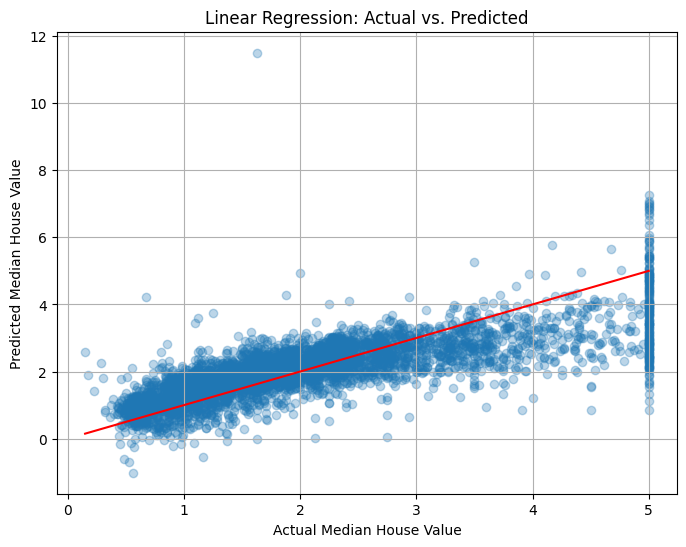

In [21]:
# Visualize Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Actual vs. Predicted")
plt.grid(True)
plt.show()

### 📊 Description
- The scatter plot compares the **actual house values** (x-axis) with the **predicted values** (y-axis).  
- Each blue dot represents one data point (a neighborhood in California).  
- The **red line** shows the line of perfect prediction (`y = x`).  
  - If the model were perfect, all points would lie on this line.

---

### ✅ Observations
1. **Positive Correlation**  
   - There is a clear upward trend: as the actual house value increases, the predicted value also tends to increase.  
   - This confirms the model captures some relationship between features and target.

2. **Underprediction at Higher Values**  
   - For higher actual values (around **4–5**), the model systematically predicts **lower values**.  
   - This suggests the linear model struggles with expensive houses, pulling predictions closer to the average.

3. **Spread of Errors**  
   - The scatter shows **high variance** around the red line.  
   - Many points are far above or below the line, meaning predictions often deviate substantially from actual values.

4. **Outliers**  
   - Some extreme outliers exist (e.g., predicted >10 while actual is ~2).  
   - These strongly affect error metrics like MSE and RMSE.

---

### 🎯 Interpretation
- The linear regression model captures general housing trends but **lacks flexibility** to accurately model complex patterns.  
- This is why the **R² score (≈0.58)** indicates moderate explanatory power.  
- For better performance, more flexible models like **Random Forests** or **Gradient Boosting** could reduce systematic underprediction and handle outliers more effectively.
